## **TASK 1 - Prediction Using Supervised ML**
* To predict the percentage of an student based on the no. of study hours they study.
* To predict score if a student studies for 9.25hrs/day

### Author - Sarath K
---

In [1]:
import numpy as np
import pandas as pd

### Importing the dataset

In [4]:
data_set = pd.read_csv('http://bit.ly/w-data')
data_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data_set.shape

(25, 2)

In [8]:
data_set.isnull().sum()

Hours     0
Scores    0
dtype: int64

**No null values found in dataset, so let us visualize our data.**

### Data Visualisation

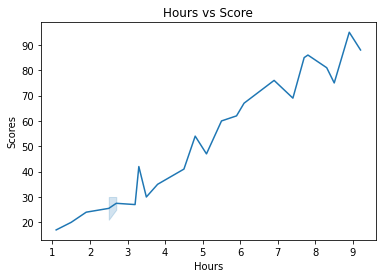

In [11]:
import matplotlib.pyplot as plt  
import seaborn as sns
sns.lineplot(x="Hours", y="Scores", data=data_set)
plt.title('Hours vs Score')  
plt.show()

**Scores and Hours are linearly correlated. As hours increase score also increase**

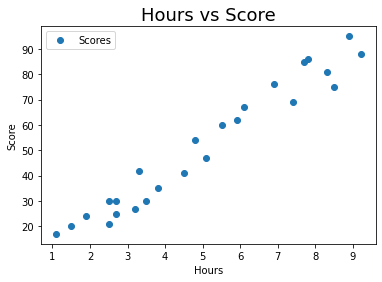

In [13]:
data_set.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score',size=18)  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

**The above scatter plot seems to suggest a correlation between the 'Marks and 'Hours'. This indicates a positive linear relationship between hours studied and percentage of mark. Plotting a regression line will confirm the correlation.**

**Regression plot**

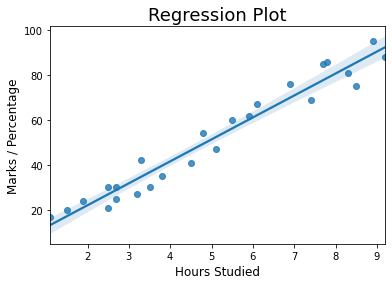

In [14]:
sns.regplot(x= data_set['Hours'], y= data_set['Scores'])
plt.title('Regression Plot',size=18)
plt.ylabel('Marks / Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Heat Map**

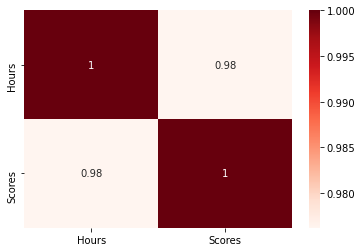

In [15]:
sns.heatmap(data_set.corr(), cmap="Reds",annot=True)
plt.show()

**The Regression plot & correlation coefficient proves that it is highly correlated .**

### Preparing data and splitting it into train and test sets.

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)

In [16]:
X = data_set.iloc[:, :-1].values 
y = data_set.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### Training the Algorithm

**Training the model using linear regression.**

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing Predicted Marks with Actual Marks.


In [20]:
dfs_mark = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dfs_mark

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Prediction of hour and marks**

In [21]:
prediction = pd.DataFrame({'Hours': [i for i in X_test], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,[1.5],16.884145
1,[3.2],33.732261
2,[7.4],75.357018
3,[2.5],26.794801
4,[5.9],60.491033


**Actual vs Predicted Plot**

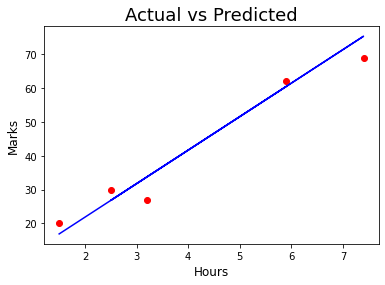

In [22]:
plt.scatter(x=X_test, y=y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Actual vs Predicted', size=18)
plt.ylabel('Marks', size=12)
plt.xlabel('Hours', size=12)
plt.show()

### Accuracy of the Model.


In [23]:
from sklearn import metrics  
metrics.r2_score(y_test,y_pred)

0.9454906892105356

In [24]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
regressor=sm.OLS(y_train,X_train).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           2.79e-13
Time:                        18:43:07   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from sklearn import linear_model as lm

### Evaluting the Model.

In [28]:
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error:  21.5987693072174
Mean Absolute Error: 4.183859899002975


**A small value for Mean Absolute Error means that the chances of error through this predictive model is very less.**

### Predicted marks for a student if they study for 9.25 hrs/day?

In [29]:
from sklearn import linear_model as lm
model=lm.LinearRegression()

In [30]:
results=model.fit(X,y)

In [31]:
#Intercept 
c=model.intercept_
c

2.483673405373196

In [32]:
#Coefficient
m=model.coef_
m

array([9.77580339])

In [33]:
x=9.25

**Applying linear equation y=mx+c here,  m:Coefficient, c:Intercept**


In [35]:
y=((m*x)+c)
y

array([92.90985477])

**Depending on the Regression Model, for a student studying 9.25 hours per day, the predicted marks will be 92.90985477**